<a href="https://colab.research.google.com/github/babyraggge/time-data-prediction-methods/blob/main/practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистический и спектральный анализ. Применение статистических критериев и тестов

<p>Бельтюков Михаил<p>
<p>РИ-481223<p>
<p>Вариант 1<p>

## Спектральный анализ

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy import signal

from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Строим периодический сигнал:

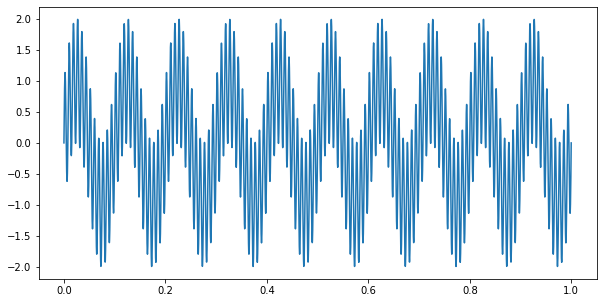

In [2]:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1);

Оцениваем периодограмму и оценку спектральной плотности мощности ряда с помощью метода Велша:

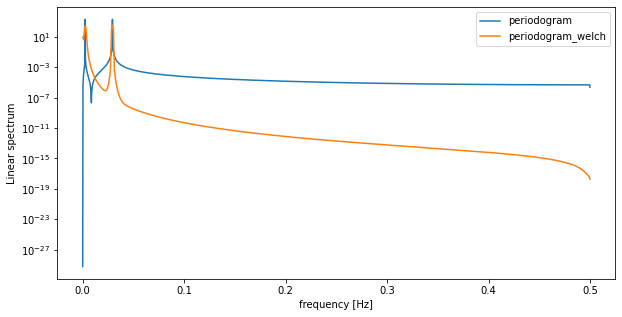

In [3]:
pd1, pdden1 = signal.periodogram(x1)
pdw1, pddenw1 = signal.welch(x1, nperseg = 1024)

plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1, label='periodogram')
plt.semilogy(pdw1, pddenw1, label='periodogram_welch')
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum')
plt.legend();

Сгенерируем периодический сигнал с изломом частоты:

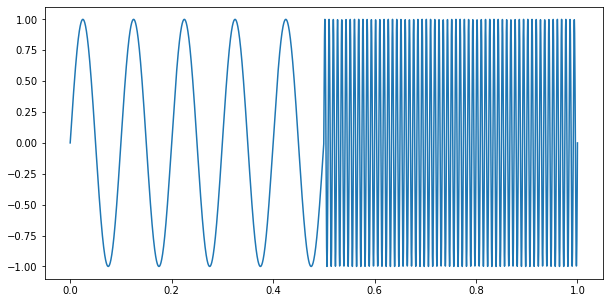

In [4]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
  x2[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
  x2[i] = np.sin(2*np.pi*120*t[i])
  
plt.figure(figsize = (10, 5))
plt.plot(t, x2);

Сделаем оценку спектров сигнала:

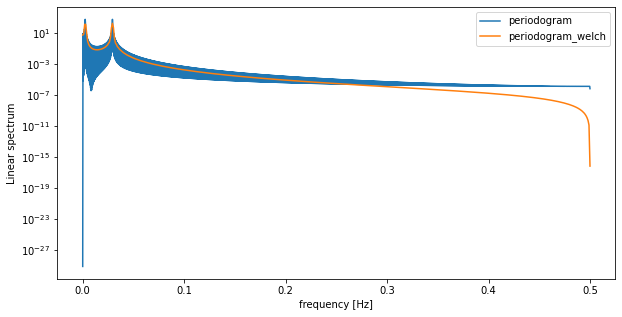

In [5]:
pd2, pdden2 = signal.periodogram(x2)
pdw2, pddenw2 = signal.welch(x2, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2, label='periodogram')
plt.semilogy(pdw2, pddenw2, label='periodogram_welch')
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum')
plt.legend();

Строим оценки спектров сигнала для обычного периодического сигнала и для периодического сигнала с изломом частоты. Видно, что форма этих оценок близка друг к другу.

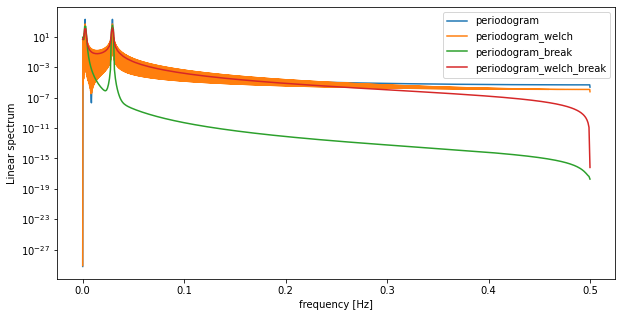

In [6]:
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1, label='periodogram')
plt.semilogy(pd2, pdden2, label='periodogram_welch')

plt.semilogy(pdw1, pddenw1, label='periodogram_break')
plt.semilogy(pdw2, pddenw2, label='periodogram_welch_break')

plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum')
plt.legend();

Проведем расчет частоты дискретизации:

In [7]:
fs = 1/(t[1]-t[0])

Строим спектрограмму для суммы двух периодик:

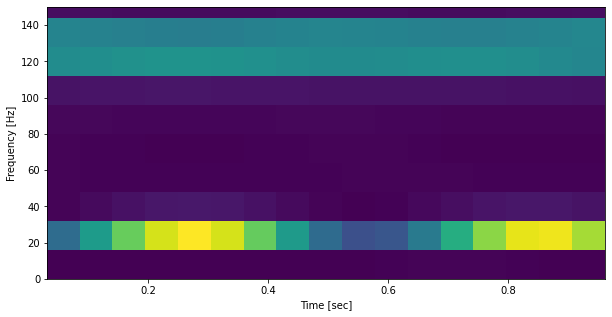

In [8]:
f, tx, Sxx= signal.spectrogram(x1, fs) # возвращаем частоту от времени
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx) # цвет –интенсивность спектрограммы
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) #строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

Изменяем параметры сегментов спектрограммы для более ярко-выраженного результата, теперь длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT= 4096:

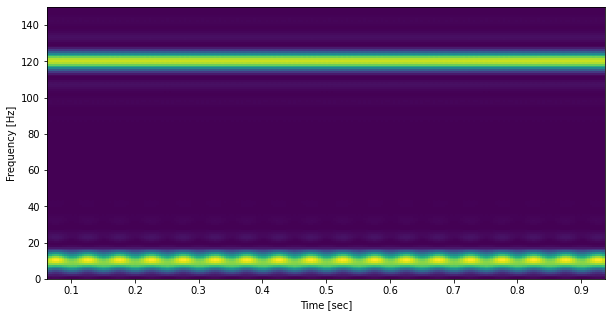

In [9]:
f, tx, Sxx= signal.spectrogram(x1, fs, nperseg= 512, noverlap= 496, nfft=4096)
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

Теперь  аналогично строим спектрограмму второго ряда x2, представляющего собой отсчеты сигнала с изломом частоты. Подберите параметры его спектрограммы самостоятельно.12)Сравните полученные спектрограммы двух рядов между собой и сделайте выводы (где есть зависимость от времени, а гд
е ее нет).

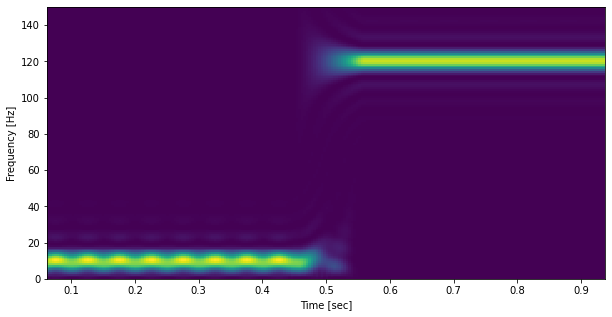

In [10]:
f, tx, Sxx= signal.spectrogram(x2, fs, nperseg= 512, noverlap= 496, nfft=4096)
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

На второй спектрограмме видно, что имеется зависимость частоты от времени, начиная с 0.5 секунд. На первой спектограмме какая-либо зависимость частоты от времени отсутствует.

Далее создадим временной ряд с линейной частотной модуляцией в диапазоне от 50 до 150 Гц:

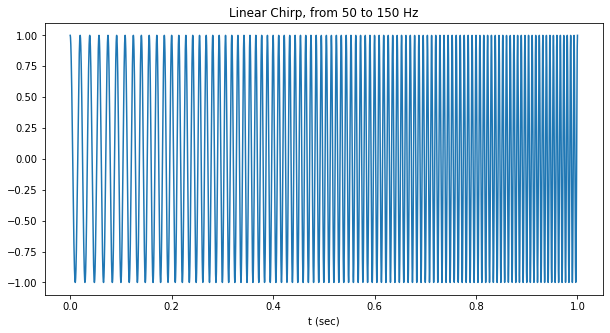

In [31]:
tx= np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек
w = signal.chirp(tx, f0=50, f1=150, t1=1, method='linear') # от 50 до 150 Гц за 1 секунду, ЛЧМ

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Linear Chirp, from 50 to 150 Hz")
plt.xlabel('t (sec)')
plt.show()

Построим спектрограмму заданного ряда, чтобы вычислить его частотно-временные  характеристики.  Рассчитаем частоту дискретизации ряда:

In [25]:
fs = 1/(tx[1]-tx[0])

Теперь строим спектрограмму:

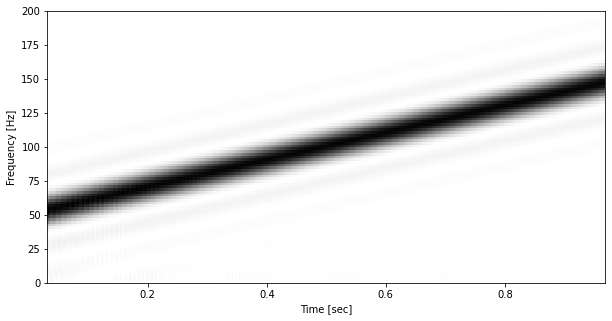

In [27]:
f, tx, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT= 4096
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 200)
plt.xlabel('Time [sec]')
plt.show()

Полученная  черно-белая  картина  спектрограммы хорошоотражает линейную структуру частотной модуляции. Для оценки диапазона частотной модуляции выполним Преобразование Гильберта:

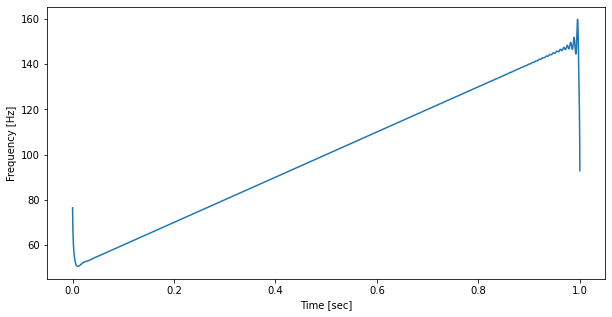

In [16]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)# мгновенная частота как производная от фазы, приведенная в Гц

plt.figure(figsize= (10, 5))
# из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Полученный график имеет четко выраженную линейную форму частоты от 50 до 150 Гц

Построим зависимость частоты от времени для следующих  модельных  временных  рядовчерез спектрограмму и преобразование Гильберта:

In [57]:
def make_spectrogram(w, tx, nperseg = 512, noverlap = 496, nfft=4096, figsize=(10, 5)):
  fs = 1/(tx[1]-tx[0])
  f, tx, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)

  plt.figure(figsize= figsize)
  plt.pcolormesh(tx, f, Sxx, cmap='gray_r') # в оттенках серого цвета
  plt.title('Spectrogram')
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()

In [58]:
def make_hilbert(w, tx, figsize=(10, 5)):
  fs = 1/(tx[1]-tx[0])
  analytic_signal = signal.hilbert(w) # аналитический сигнал
  instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде
  instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)# мгновенная частота как производная от фазы, приведенная в Гц

  plt.figure(figsize=figsize)
  # из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:
  plt.plot(tx[1:], instantaneous_frequency)
  plt.title('Hilbert transform')
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()

Для ЛЧМ в большем диапазоне:

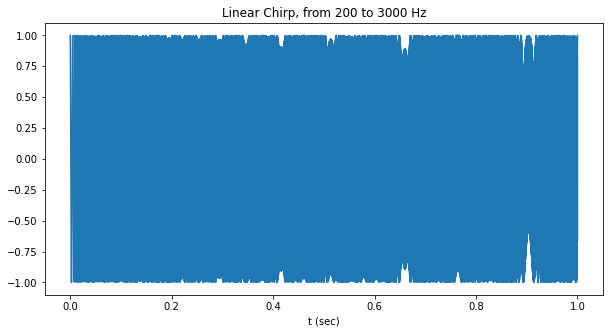

In [59]:
tx= np.linspace(0, 1, 8192) # ЛЧМ в большем диапазоне
w = signal.chirp(tx, f0=200, f1=3000, t1=1, method='linear')

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Linear Chirp, from 200 to 3000 Hz")
plt.xlabel('t (sec)')
plt.show()

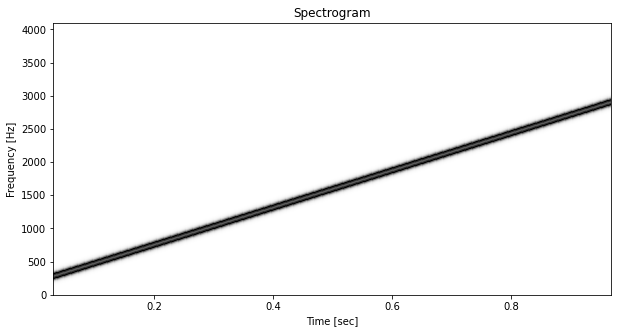

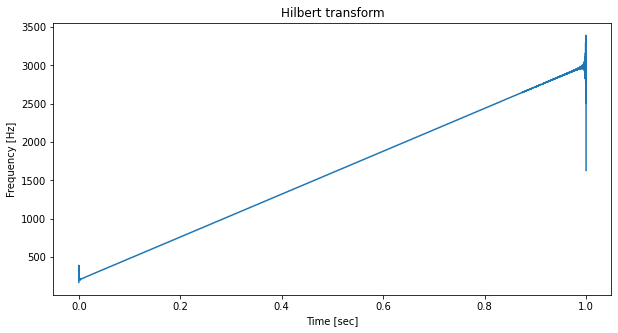

In [60]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

Ряд с квадратичной частотной модуляцией:

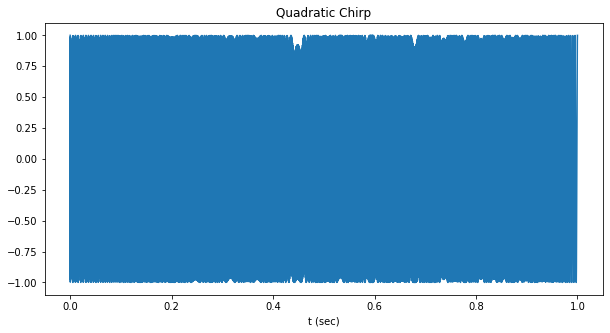

In [71]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2000, f1=200, t1=1, method='quadratic')

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Quadratic Chirp")
plt.xlabel('t (sec)')
plt.show()

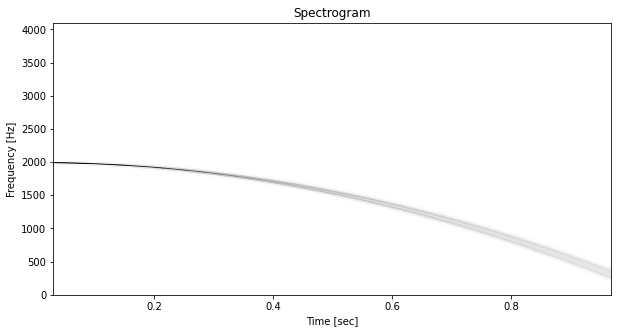

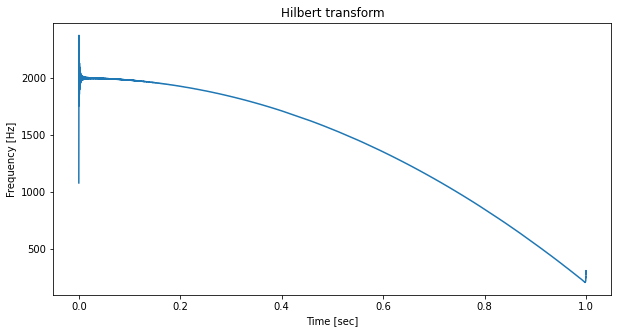

In [65]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

Ряд с инверсной квадратичной частотной модуляцией:

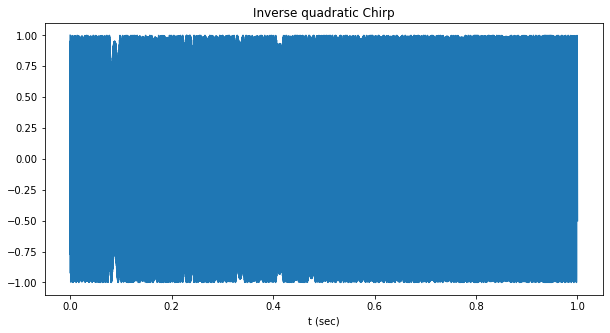

In [70]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=3200, f1=400, t1=1, method='quadratic', vertex_zero=False)

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Inverse quadratic Chirp")
plt.xlabel('t (sec)')
plt.show()

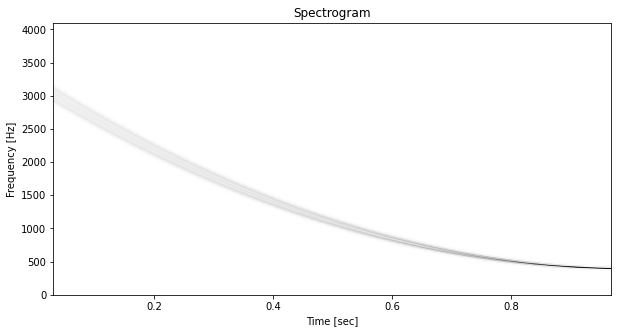

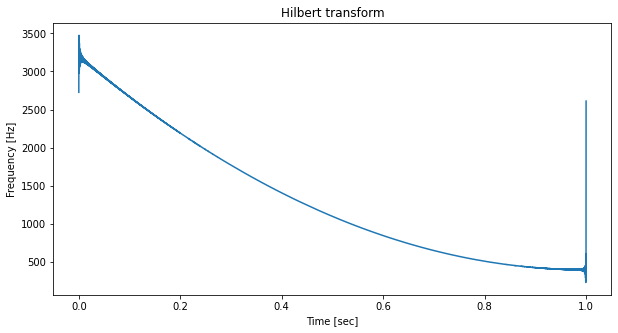

In [67]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

Ряд с логарифмической частотной модуляцией: 

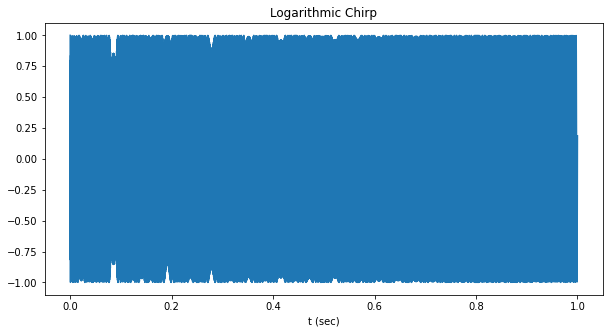

In [72]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2450, f1=300, t1=1, method='logarithmic')

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Logarithmic Chirp")
plt.xlabel('t (sec)')
plt.show()

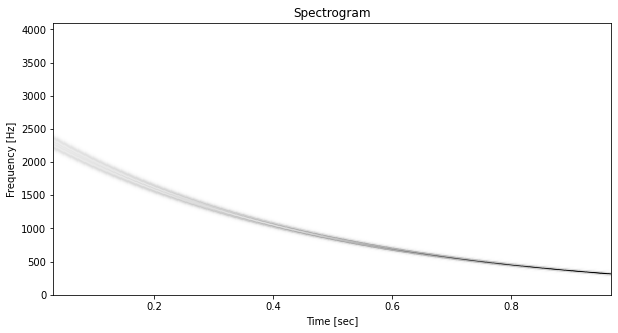

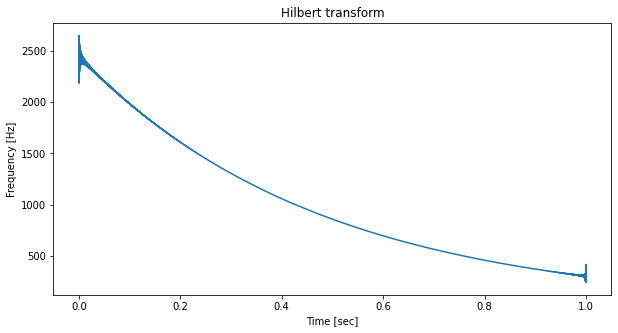

In [69]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

Ряд с гиперболической частотной модуляцией:

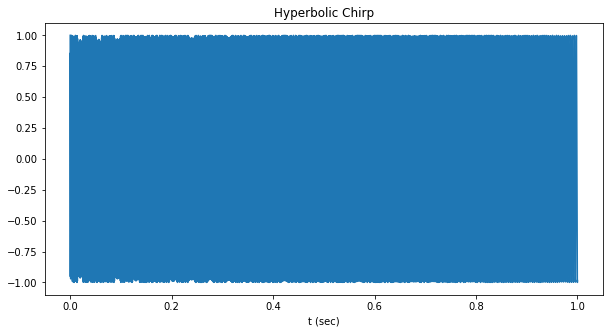

In [73]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=1500, f1=250, t1=1, method='hyperbolic')

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Hyperbolic Chirp")
plt.xlabel('t (sec)')
plt.show()

In [ ]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

Ряд с полиномиальной частотной модуляцией:

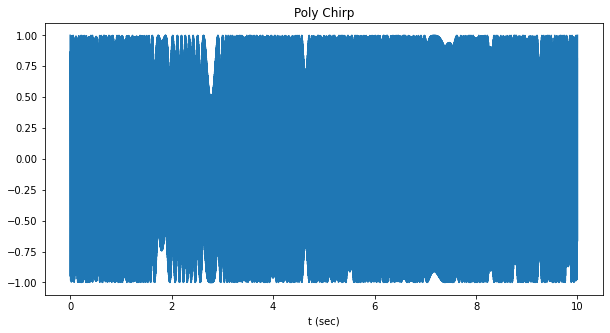

In [74]:
tx = np.linspace(0, 10, 8192)
p = np.poly1d([2.5, -36.0, 125.0, 150.0])
w = signal.sweep_poly(tx, p)

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Poly Chirp")
plt.xlabel('t (sec)')
plt.show()

In [ ]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

Ряд с частотной модуляцией другим гармоническим сигналом:

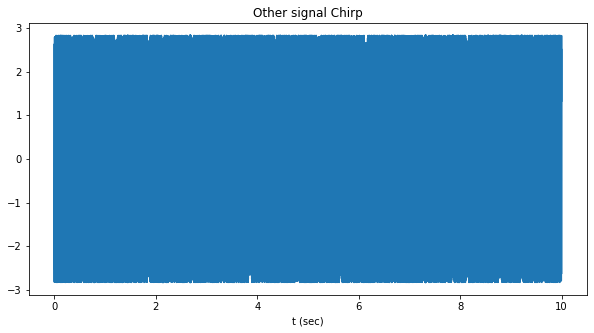

In [76]:
tx = np.linspace(0, 10, 2*8192)
mod = 500*np.cos(2*np.pi*0.25*tx)
w = 2 * np.sqrt(2) * np.sin(2*np.pi*300*tx + mod)

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Other signal Chirp")
plt.xlabel('t (sec)')
plt.show()

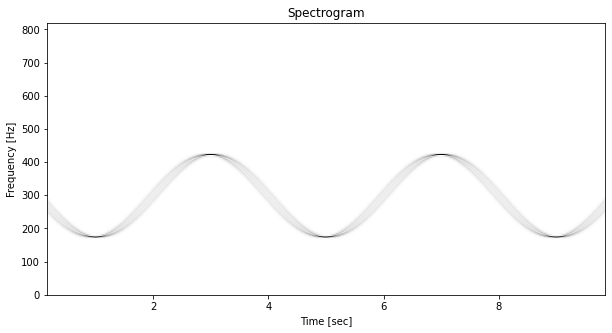

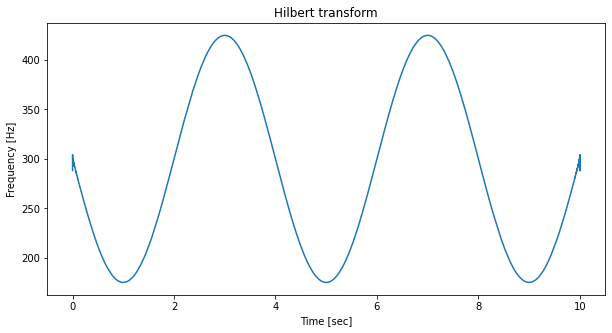

In [77]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

Временной  рядиз 4 периодик без  шума:

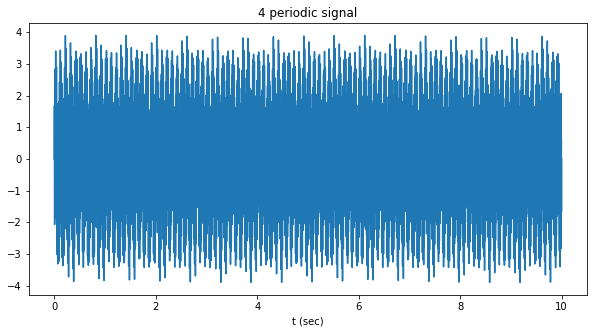

In [82]:
tx = np.linspace(0, 10, 2*8192)
w = np.sin(2*np.pi*10*tx) + np.sin(2*np.pi*120*tx) + np.sin(2*np.pi*500*tx) + np.sin(2*np.pi*1200*tx)

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("4 periodic signal")
plt.xlabel('t (sec)')
plt.show()

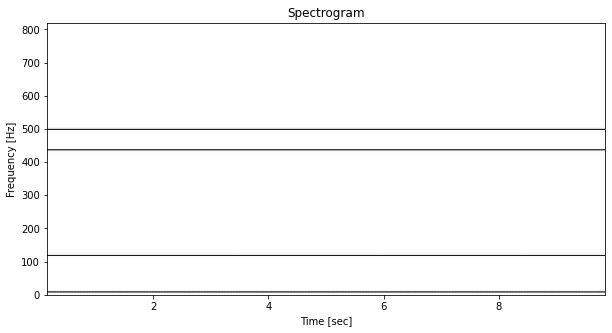

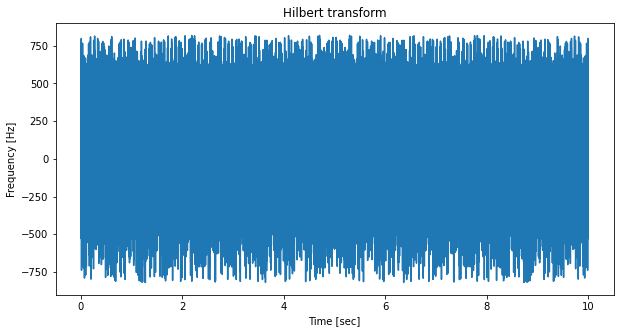

In [83]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

## Проверка статистических гипотез

Создаем временной ряд, как частную выборку из нормального распределения:

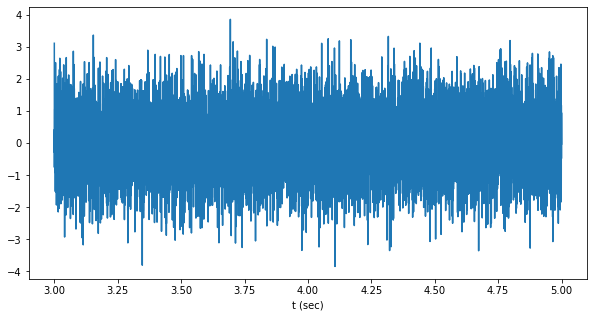

In [103]:
x = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.xlabel('t (sec)')
plt.show()

Произведем оценку  ВР  на стационарность, используя KPSS-тест. В качестве нулевой гипотизы соответственно рассматирвам стационарность данного ряда.

In [104]:
kpss_stat, p_value, lags, crit = tsa.kpss(x)
print(f" Статистика KPSS теста: {kpss_stat}\n p-value: {p_value}")

 Статистика KPSS теста: 0.1376578997387232
 p-value: 0.1


Анализируя статистику KPSS теста (близко к 0), и p значение (больше 0.05) с достаточной долей уверенности нулевая гипотиза не отвергается. Ряд является стационарным.

Внесем явную нестационарность в этот ряд:

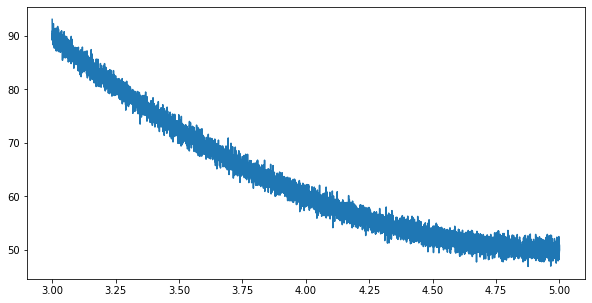

In [105]:
xv=x+(10*t**2-100*t+300)
plt.figure(figsize = (10, 5))
plt.plot(t, xv)
plt.show()

Так же применяем KPSS тест:

In [106]:
kpss_stat, p_value, lags, crit = tsa.kpss(xv)
print(f" Статистика KPSS теста: {kpss_stat}\n p-value: {p_value}")

 Статистика KPSS теста: 24.49897587046622
 p-value: 0.01


В данном случае нулевая гипотиза отвергается с достаточной уверенностью. Данный ряд не явлется стационарным (статистика сильно больше 0, а p значение меньше 0.05).

Проверем с помощью однофакторного дисперсионного анализа две половинки(по времени) исходного временного рядана соответствие дисперсий, чтобы убедиться, что это частные выборки  одной  и  той  же  случайной  величины:

In [107]:
F, p_value = stats.f_oneway(x[:5000], x[5000:])
print(f" F статистика теста: {F}\n p-value: {p_value}")

 F статистика теста: 0.6654172924105931
 p-value: 0.4146733575235546


Значение p-value говорит о том, что нет достаточных оснований полагать, что данные выборки отностятся к разным случайным величинам. Нулевая гипотиза о равенстве дисперсий не отвергается.

Проведем однофакторный дисперсионный анализ для модифицированноговременного ряда:

In [108]:
F, p_value = stats.f_oneway(xv[:5000], xv[5000:])
print(f" F статистика теста: {F}\n p-value: {p_value}")

 F статистика теста: 23035.75868670148
 p-value: 0.0


В данном случае p значение меньше 0.5, поэтому нулевая гипотиза о равенстве дисперсий отвергается.

Проверем с помощью  критерия Стьюдента две половинки исходного  временного  ряда на соответствие мат. ожиданий при предположении о равных дисперсиях:

In [112]:
T, p_value = stats.ttest_ind(x[:5000], x[5000:])
print(f" T статистика теста: {T}\n p-value: {p_value}")

 T статистика теста: -0.8157311397823385
 p-value: 0.4146733575241972


Для исходного времееного ряда показтель p значения сильно больше 0.5, нулевая гипотиза о равенстве мат. ожиданий не отвергается.

Так же проведем T тест для модифицированного временного ряда:

In [113]:
T, p_value = stats.ttest_ind(xv[:5000], xv[5000:])
print(f" T статистика теста: {T}\n p-value: {p_value}")

 T статистика теста: 151.77535599266923
 p-value: 0.0


В данном случае p значение меньше 0.5, поэтому нулевая гипотиза о равенстве мат. ожиданий отвергается.